In this example, we will plot the velocity and acceleration for the event on February 25, 2014 based on the data on the dependence of the CME height on time.

First, import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from regularization_derivatives import regularization_derivatives as reg

Let's enter the data of distance, time and errors of distance received by us. You can also import data from a file, but here they are for clarity.

In [2]:
height = np.array([ 964.48638319,  964.48638319,  964.48638319,  964.48638319,
        965.40255868,  965.40255868,  965.40255868,  965.40255868,
        964.48638319,  965.40255868,  965.40255868,  965.40255868,
        966.31873866,  968.15111198,  969.06730531,  971.81591181,
        972.73212277,  973.64833811,  977.31324298,  982.81072953,
        985.55953026,  989.22465675,  994.72247112, 1001.13677396,
       1007.55127353, 1013.96596611, 1023.13014027, 1035.04412757,
       1066.20663752, 1108.37374065, 1156.96530713, 1205.56419367])

t_height = np.array([  0.  ,  12.  ,  24.  ,  36.  ,  48.  ,  60.  ,  72.  ,  84.  ,
        96.  , 108.  , 120.  , 132.  , 144.  , 156.  , 168.  , 180.  ,
       192.  , 204.  , 216.  , 228.  , 240.  , 252.  , 265.4 , 276.  ,
       289.33, 300.  , 313.25, 324.  , 348.  , 372.  , 396.  , 420.  ])

err_height = np.array([0.7174407 , 0.72143083, 0.73994687, 0.75370621, 0.63495875,
       0.73046211, 0.73817969, 0.74323592, 1.10193433, 1.28267994,
       0.7491363 , 1.58711346, 1.22538166, 1.05176949, 1.07634187,
       1.32918812, 1.35735452, 1.61627264, 1.30971032, 1.75185919,
       1.52550909, 1.5079054 , 1.86874998, 1.63118242, 1.28446757,
       1.58876485, 1.48698627, 1.6440601 , 1.88663467, 2.3718103 ,
       2.02909116, 1.76662108])

Let's look at the initial data that we have (multiplying by 725 is the conversion of arcsec to km):

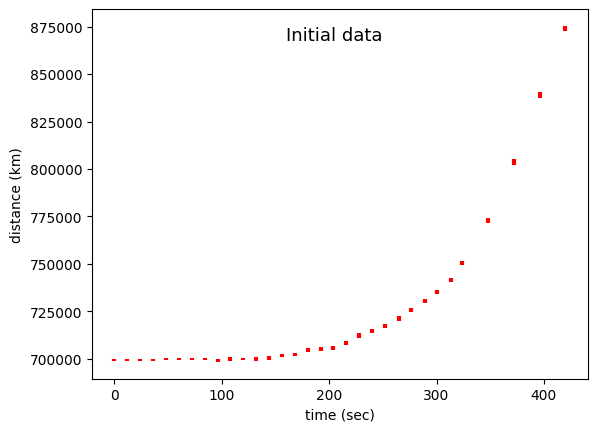

In [3]:
plt.errorbar(t_height, height*725, err_height*725,fmt='none',ecolor='r',elinewidth=3,)
plt.xlabel('time (sec)')
plt.ylabel('distance (km)')
plt.text(250, 875000, 'Initial data',
         #rotation=45,
         horizontalalignment='right',
         verticalalignment='top',
         multialignment='center',
         color = 'black',
         size = 13)
plt.show()

The first thing we want to get is speed. To use the regularization method, you need to select the *alpha* parameter. To do this, set the parameters *ord = 3* (because after that we want to get a smooth acceleration function) and *print_parametrs = True*

First, we select the power *alpha*, focusing on *quotient*, and then the numbers after the decimal point.

In [4]:
reg.regularization(height, t_height, err_height, alpha=1.5e11, ord=3, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.5758624061380799
reduced chi2 for integrated regularization results =  0.4523874717777187


(array([  6.77419355,  20.32258065,  33.87096774,  47.41935484,
         60.96774194,  74.51612903,  88.06451613, 101.61290323,
        115.16129032, 128.70967742, 142.25806452, 155.80645161,
        169.35483871, 182.90322581, 196.4516129 , 210.        ,
        223.5483871 , 237.09677419, 250.64516129, 264.19354839,
        277.74193548, 291.29032258, 304.83870968, 318.38709677,
        331.93548387, 345.48387097, 359.03225806, 372.58064516,
        386.12903226, 399.67741935, 413.22580645]),
 array([ 2.90793895e-02,  1.53737289e-02,  4.65140974e-03, -2.86290709e-03,
        -6.48661575e-03, -5.19374718e-03,  2.01534985e-03,  1.56815422e-02,
         3.56275440e-02,  6.09264633e-02,  9.00344288e-02,  1.21184581e-01,
         1.52848620e-01,  1.84035667e-01,  2.14619715e-01,  2.45730902e-01,
         2.80503287e-01,  3.24567643e-01,  3.85387442e-01,  4.70715102e-01,
         5.86710754e-01,  7.35972110e-01,  9.15927690e-01,  1.11865669e+00,
         1.33244235e+00,  1.54441093e+00,  1

We picked up alpha so that *quotient* is 0.57 with a nice $\chi^2$. Why didn't we achieve *quotient=1*? The answer to this question lies in the backward integration of the obtained velocities. If we worked with *quotient = 1*, we would get a fairly smooth function, but the function obtained by back integration would be very different from the initial one. Let's write down the obtained speed values:

In [5]:
t_vel, vel, height_back = reg.regularization(height, t_height, err_height, alpha=1.5e11, ord=3, print_parameters=False, mk=False)

Now let's find the errors of the obtained velocities using the Monte Carlo method. To do this, set the parameter *mk = True*. Parameter *num_mk = 100* by default, we will not change it. Write the results to the appropriate variables

In [6]:
t_vel, vel_mk, err_vel = reg.regularization(height, t_height, err_height, alpha=1.5e11, ord=3, print_parameters=False, mk=True)

100%|██████████| 100/100 [00:17<00:00,  5.56it/s]


Let's look what we got

Text(0.5, 0, 'time (sec)')

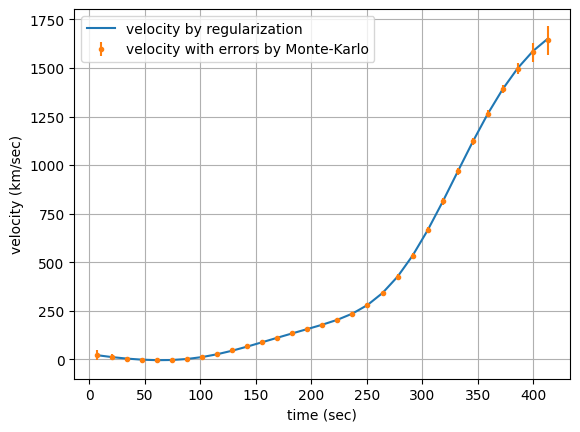

In [7]:
fig, ax = plt.subplots()
ax.plot(t_vel,vel*725, label = 'velocity by regularization')
ax.errorbar(t_vel,vel_mk*725,err_vel*725,fmt='.', label = 'velocity with errors by Monte-Karlo')
ax.legend()
ax.grid()
ax.set_ylabel('velocity (km/sec)')
ax.set_xlabel('time (sec)')

Let's plot our initial data and the integrated rate obtained by the regularization method on the same graph in order to compare how much they differ and how well we got into the initially specified errors:

Text(0, 0.5, 'error overrun')

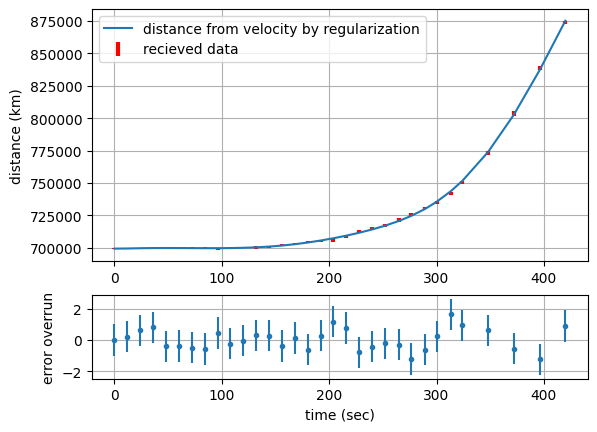

In [8]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_height, height*725,err_height*725,fmt='none',ecolor='r',elinewidth=3, label = 'recieved data')
ax[0].plot(t_height, height_back*725, label = 'distance from velocity by regularization')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('distance (km)')

ax[1].errorbar(t_height, (height_back-height)/err_height,1,fmt='.')
ax[1].grid()
ax[1].set_xlabel('time (sec)')
ax[1].set_ylabel('error overrun')

But what would happen if we took *quotient = 1*:

In [9]:
t_vel_1, vel_1, height_back_1 = reg.regularization(height, t_height, err_height, alpha=5.39e11, ord=3, print_parameters=False, mk=False)
t_vel_1, vel_mk_1, err_vel_1 = reg.regularization(height, t_height, err_height, alpha=5.39e11, ord=3, print_parameters=False, mk=True)

100%|██████████| 100/100 [00:19<00:00,  5.16it/s]


Text(0, 0.5, 'error overrun')

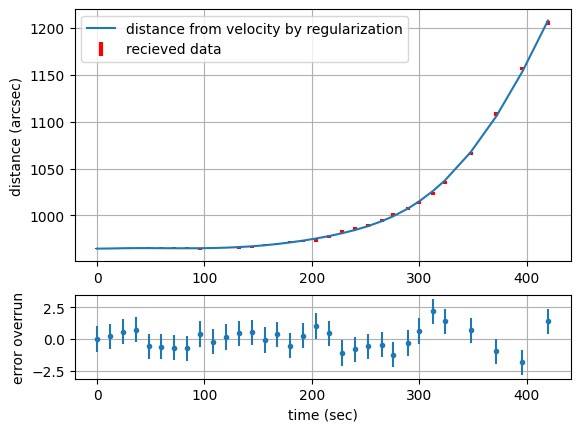

In [10]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_height, height,err_height,fmt='none',ecolor='r',elinewidth=3, label = 'recieved data')
ax[0].plot(t_height, height_back_1, label = 'distance from velocity by regularization')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('distance (arcsec)')

ax[1].errorbar(t_height, (height_back_1-height)/err_height,1,fmt='.')
ax[1].grid()
ax[1].set_xlabel('time (sec)')
ax[1].set_ylabel('error overrun')

As you can see, the resulting function fits the initial data much worse, so the construction of this graph is another selection criterion *alpha*

Now let's find the acceleration. Set *ord = 2* and, as in the previous paragraph, first determine the necessary *alpha*

In [11]:
reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.06398916455293872
reduced chi2 for integrated regularization results =  0.16790199511589565


(array([ 13.5483871 ,  27.09677419,  40.64516129,  54.19354839,
         67.74193548,  81.29032258,  94.83870968, 108.38709677,
        121.93548387, 135.48387097, 149.03225806, 162.58064516,
        176.12903226, 189.67741935, 203.22580645, 216.77419355,
        230.32258065, 243.87096774, 257.41935484, 270.96774194,
        284.51612903, 298.06451613, 311.61290323, 325.16129032,
        338.70967742, 352.25806452, 365.80645161, 379.35483871,
        392.90322581, 406.4516129 ]),
 array([-1.37186805e-03, -9.21904857e-04, -4.73080840e-04, -2.01683043e-05,
         4.40114346e-04,  8.99287137e-04,  1.33361817e-03,  1.70931768e-03,
         1.99037838e-03,  2.14922751e-03,  2.18188333e-03,  2.12184599e-03,
         2.04698294e-03,  2.07642458e-03,  2.35298204e-03,  3.01192226e-03,
         4.14357572e-03,  5.75805297e-03,  7.76322507e-03,  9.96439624e-03,
         1.20919440e-02,  1.38556537e-02,  1.50099771e-02,  1.54071586e-02,
         1.50236776e-02,  1.39543786e-02,  1.23747872e-02,

Let's write down the obtained acceleration values and find the errors using the Monte Carlo method:

In [12]:
t_acc, acc, vel_back = reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.06398916455293872
reduced chi2 for integrated regularization results =  0.16790199511589565


In [13]:
t_acc, acc_mk, err_acc = reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=True)

Optimization terminated successfully
quotient = 0.06398916455293872
reduced chi2 for integrated regularization results =  0.16790199511589565


100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


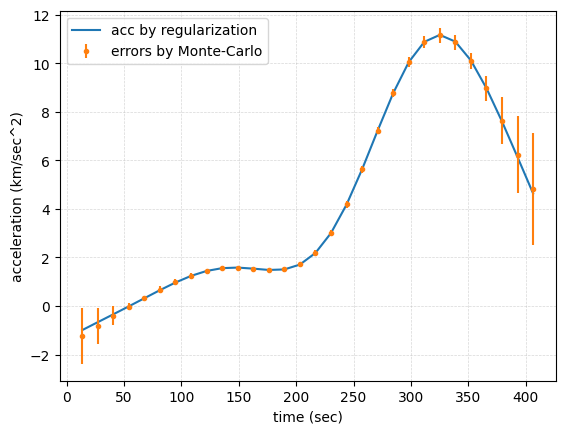

In [14]:
plt.plot(t_acc,acc*725, label = 'acc by regularization')
plt.errorbar(t_acc,acc_mk*725,err_acc*725,fmt='.', label = 'errors by Monte-Carlo')

plt.xlabel('time (sec)')
plt.ylabel('acceleration (km/sec^2)')

plt.grid(linestyle = '--',linewidth = 0.5, alpha=0.5)
plt.legend()
plt.show()

Again we see a strong increase in errors on the tails due to the features of the Monte Carlo method

Let's build the speed from the obtained acceleration and compare it with the speed from the previous paragraph:

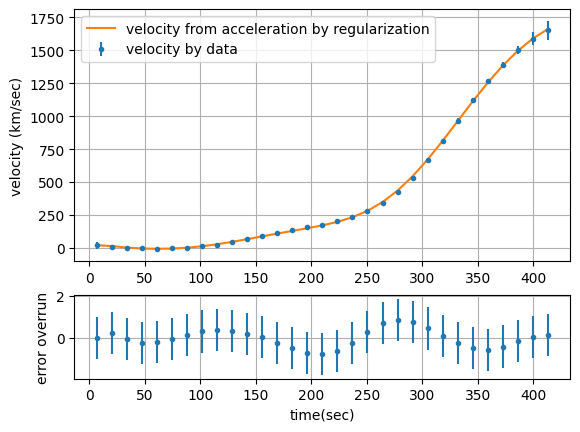

In [15]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_vel, vel*725,err_vel*725,fmt='.', label = 'velocity by data')
ax[0].plot(t_vel, vel_back*725, label = 'velocity from acceleration by regularization')
ax[0].set_ylabel('velocity (km/sec)')
ax[0].grid()
ax[0].legend()

ax[1].errorbar(t_vel, (vel_back-vel)/err_vel,1,fmt='.')
ax[1].set_ylabel('error overrun')
ax[1].set_xlabel('time(sec)')
plt.grid()

The resulting acceleration speed is within the error